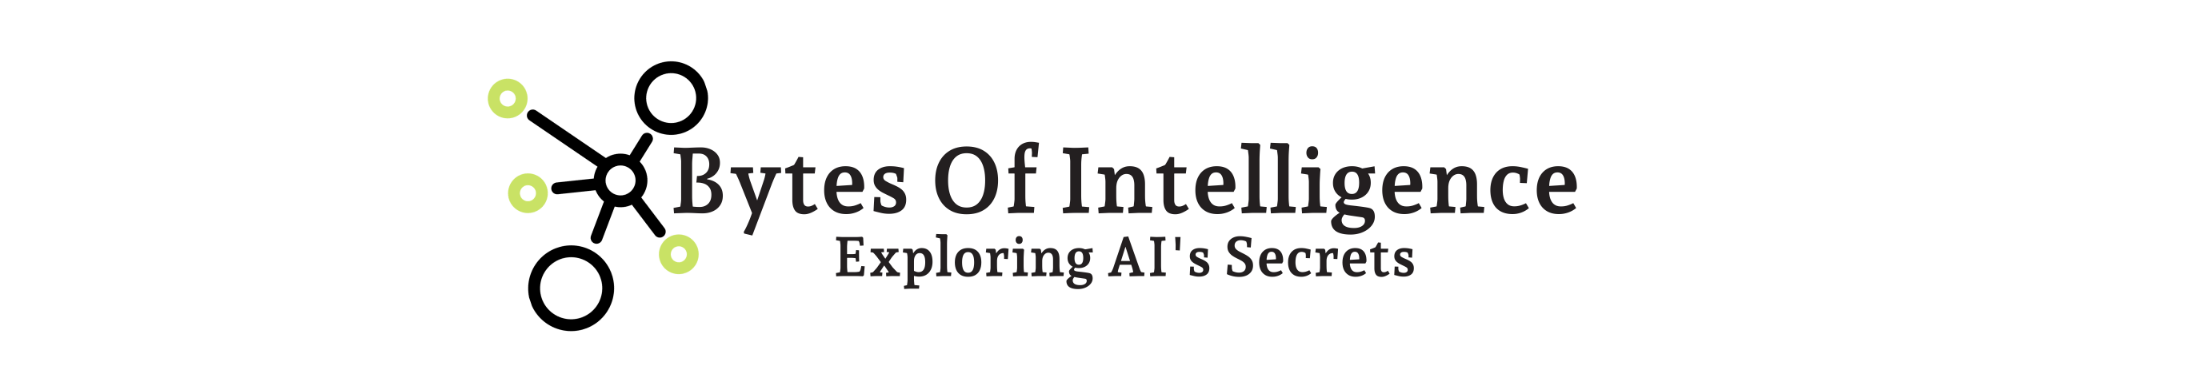
<center><h1>Chapter 03: Simple Neural Network With AutoGrad</h1></center>

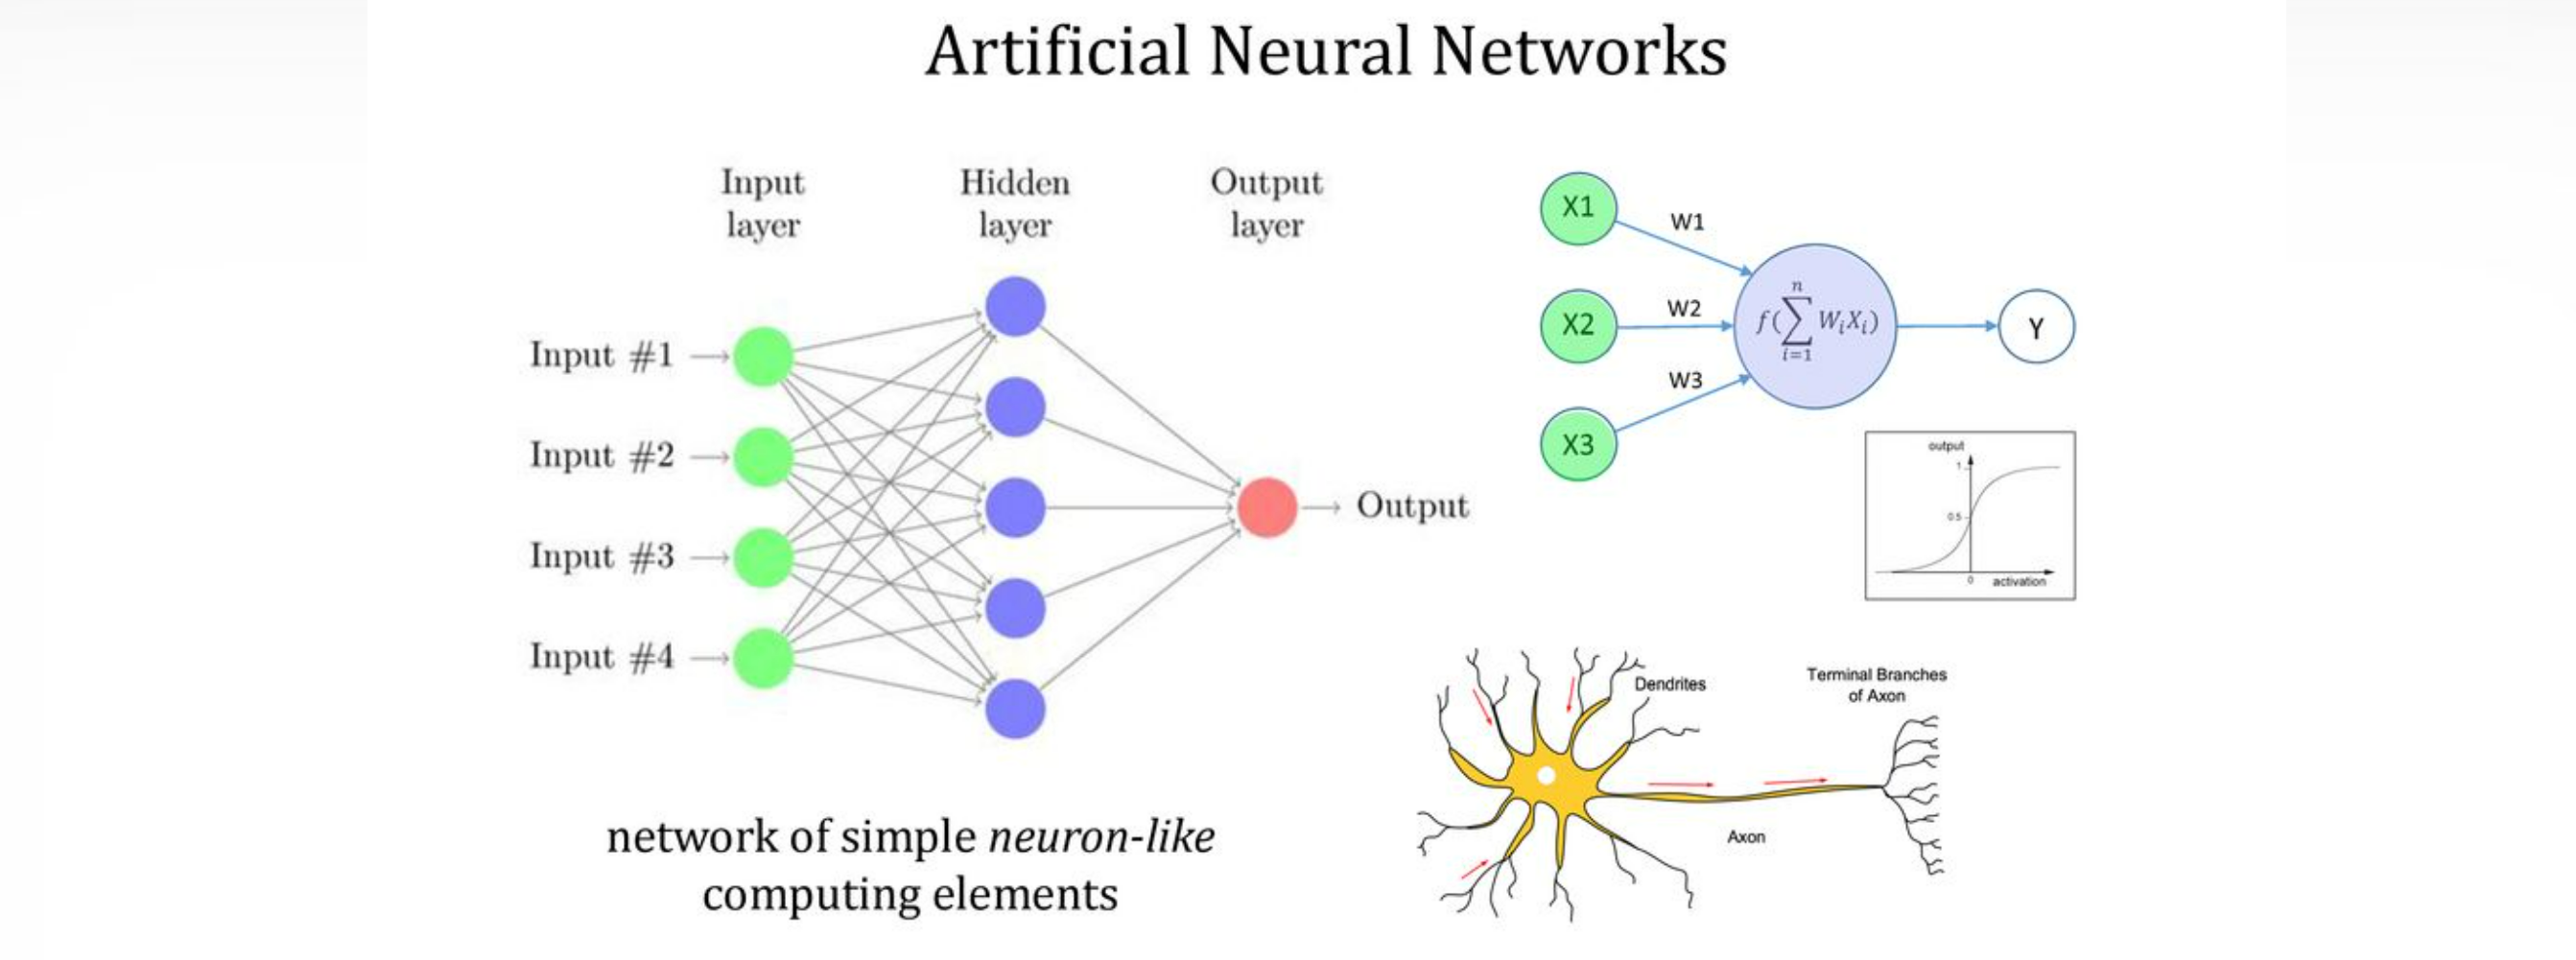
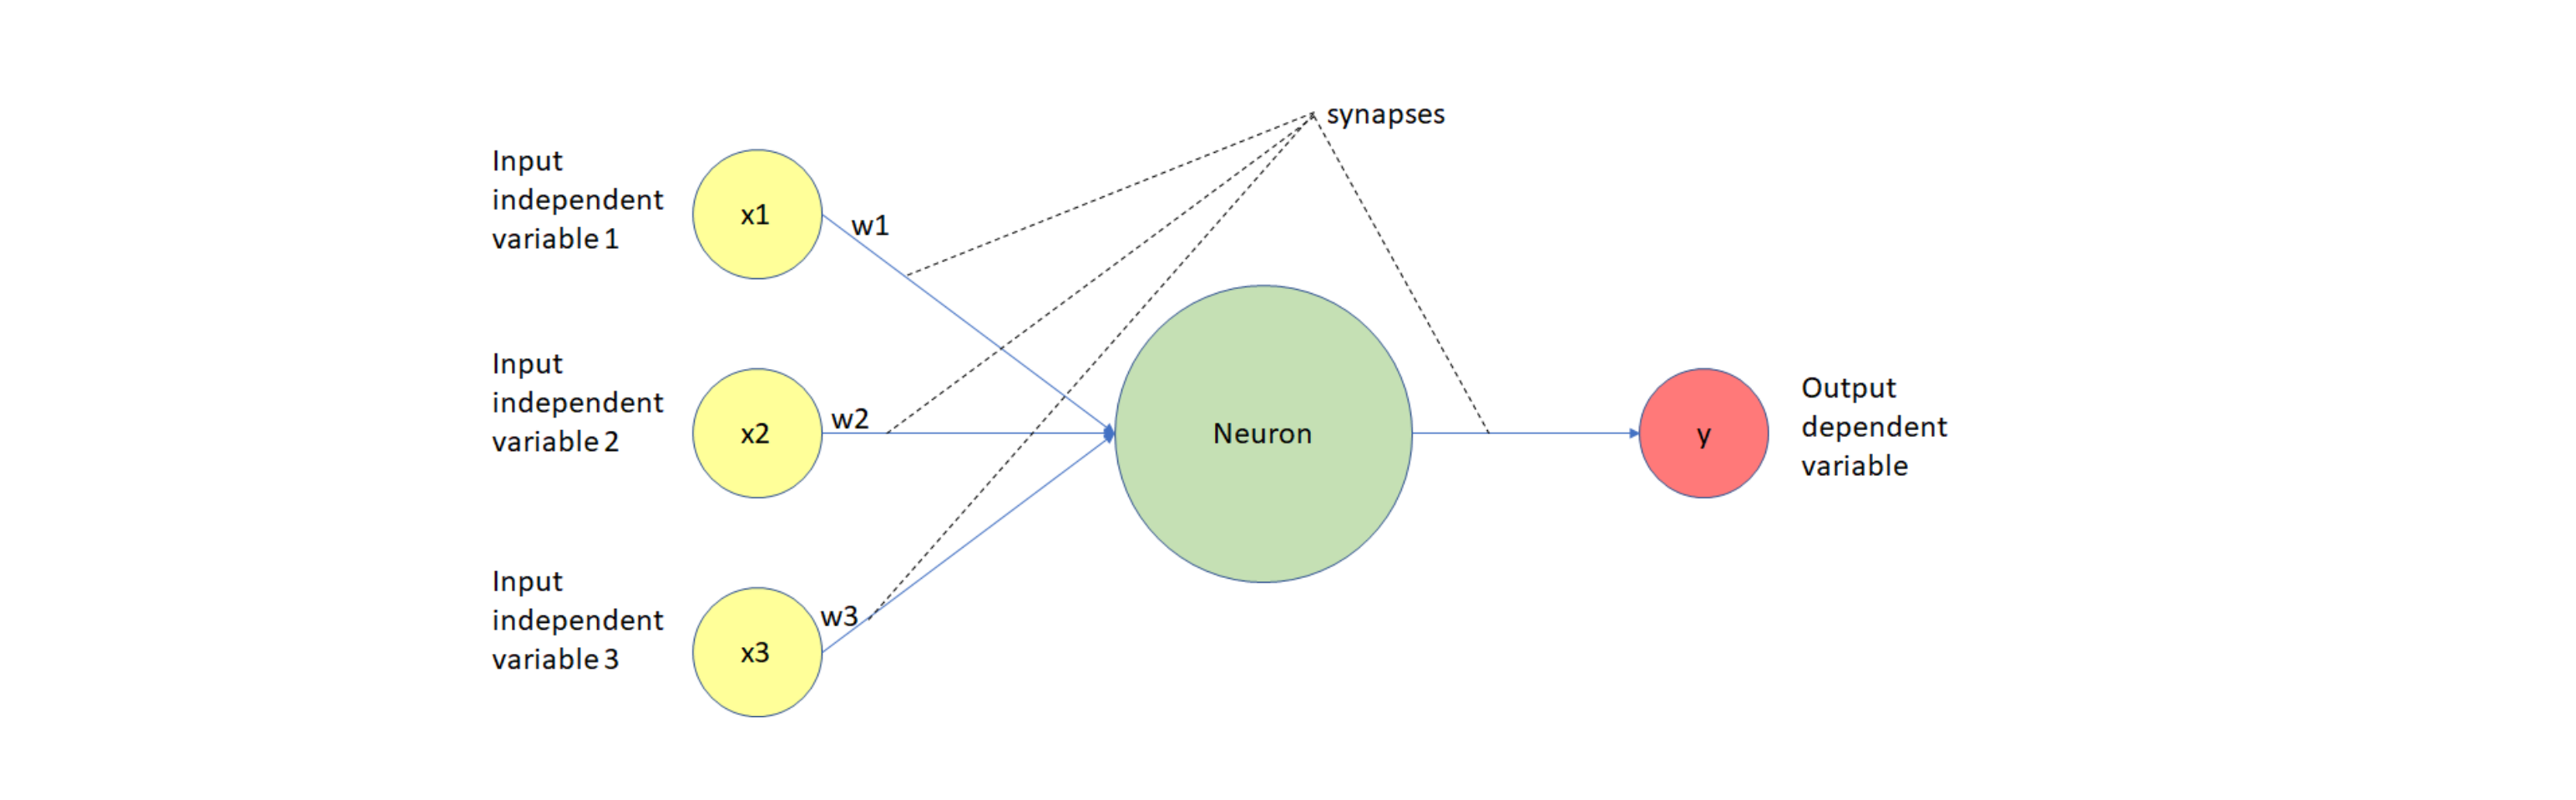

In [3]:
import torch
import torch.nn as nn

class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        self.layer01 = nn.Linear(3, 5)
        self.layer02 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.layer01(x))
        x = self.layer02(x)
        return x
    

network = SimpleNeuralNetwork()

input_datasets= torch.randn(10, 3)
actual_value = torch.randn(10, 1)

predict_result = network(input_datasets)

loss_calculate = nn.MSELoss()
loss_update = loss_calculate(predict_result, actual_value)

print(f"Total Losses of the model is :{loss_update.item()}")

network.zero_grad()
loss_update.backward()

print(f"Layer 01 Gradients Value is : \n{network.layer01.weight.grad}\n")
print(f"Layer 02 Gradients Value is : \n{network.layer02.weight.grad}")

Total Losses of the model is :1.2580764293670654
Layer 01 Gradients Value is : 
tensor([[-0.3303,  0.0184, -0.0911],
        [-0.1158,  0.0430,  0.0518],
        [ 0.0969,  0.0040,  0.0600],
        [-0.0296,  0.0095,  0.0069],
        [ 0.1211, -0.0701,  0.0086]])

Layer 02 Gradients Value is : 
tensor([[-0.1191, -0.1575, -0.2805, -0.4176, -0.0929]])
